In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# EU

In [6]:


df_EU = pd.read_csv(r"Cfile.csv")


In [8]:
print(df_EU.columns)

Index(['Company Name', 'ISIN Code', 'Ticker Symbol', 'Country of Exchange',
       'NAICS National Industry Name', 'MarketCap_2025', 'MarketCap_2024',
       'MarketCap_2023', 'MarketCap_2022', 'MarketCap_2021',
       ...
       'EPS_score_2009', 'EPS_score_2008', 'EPS_score_2007', 'EPS_score_2006',
       'EPS_score_2005', 'EPS_score_2004', 'EPS_score_2003', 'EPS_score_2002',
       'EPS_score_2001', 'EPS_score_2000'],
      dtype='object', length=245)


In [10]:
# Define the columns to keep
base_columns = ['Company Name', 'ISIN Code', 'Ticker Symbol', 'Country of Exchange', 'NAICS National Industry Name']
year_columns = [col for col in df_EU.columns if any(str(year) in col for year in range(2004, 2024))]

# Filter dataset
df_filtered = df_EU[base_columns + year_columns]

# Display the new dataset
print(df_filtered.head())


                                     Company Name     ISIN Code Ticker Symbol  \
0                                    3i Group PLC  GB00B1YW4409           III   
1                                         A2A SpA  IT0001233417           A2A   
2                                   AAK AB (publ)           NaN           AAK   
3                                ABN Amro Bank NV           NaN           ABN   
4  ACS Actividades de Construccion y Servicios SA           NaN           ACS   

  Country of Exchange              NAICS National Industry Name  \
0      United Kingdom              Miscellaneous Intermediation   
1               Italy           Other Electric Power Generation   
2              Sweden       Fats and Oils Refining and Blending   
3         Netherlands                        Commercial Banking   
4               Spain  Highway, Street, and Bridge Construction   

      MarketCap_2023     MarketCap_2022     MarketCap_2021     MarketCap_2020  \
0  20,226,586,593.37  17,747,

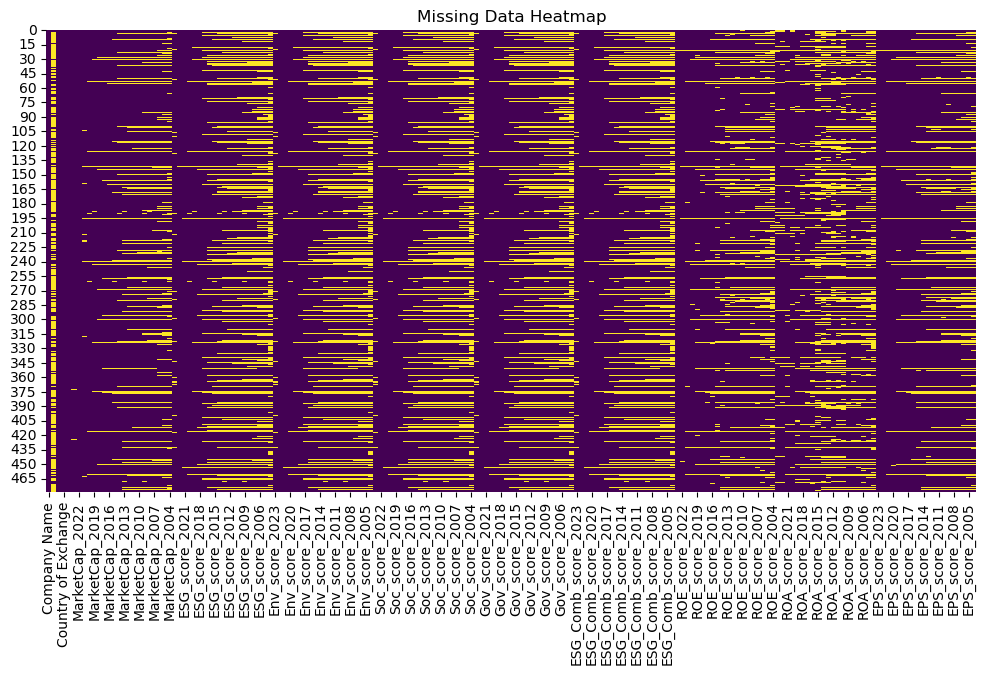

In [20]:
# Check missing values
plt.figure(figsize=(12,6))
sns.heatmap(df_filtered.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

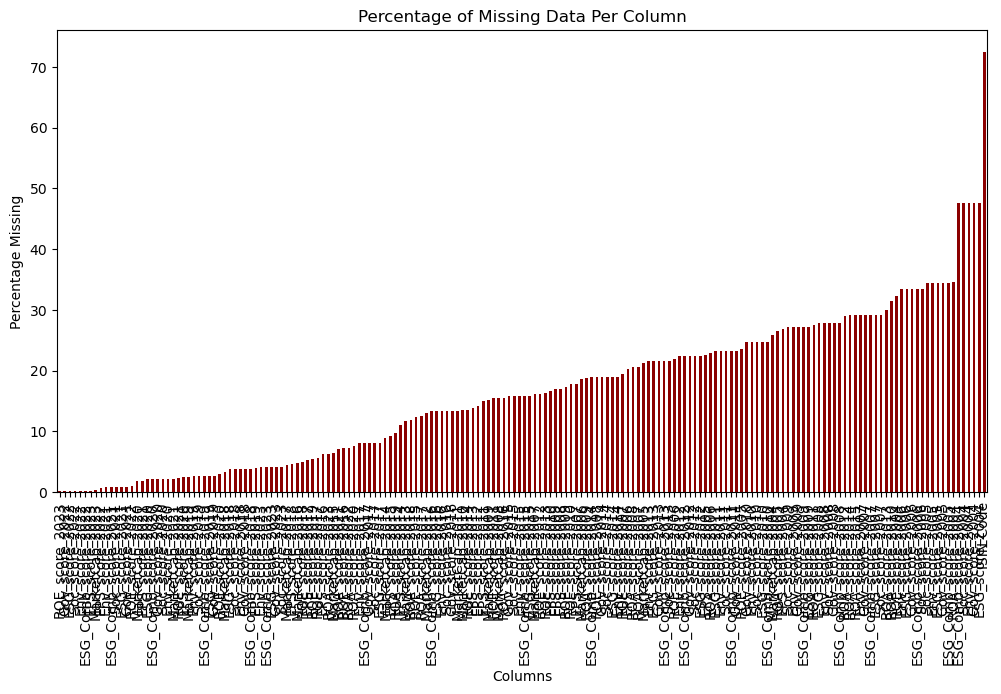

In [22]:
missing_percentage = (df_filtered.isnull().sum() / len(df_filtered)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values()

# Plot missing values
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar', color='darkred')
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
plt.title("Percentage of Missing Data Per Column")
plt.show()


In [24]:
total_missing = df_filtered.isnull().sum().sum()
total_cells = df_filtered.shape[0] * df_filtered.shape[1]
missing_ratio = (total_missing / total_cells) * 100

print(f"Total Missing Values: {total_missing}")
print(f"Percentage of Missing Data: {missing_ratio:.2f}%")


Total Missing Values: 14171
Percentage of Missing Data: 15.99%


In [26]:
# Get basic dataset information
num_rows = df_filtered.shape[0]  # Number of rows
num_columns = df_filtered.shape[1]  # Number of columns
total_datapoints = num_rows * num_columns  # Total number of data points

# Count missing values
total_missing = df_filtered.isnull().sum().sum()
missing_ratio = (total_missing / total_datapoints) * 100

# Print the dataset summary
print(f"Dataset Overview:")
print(f"-----------------")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")
print(f"Total Data Points: {total_datapoints}")
print(f"Total Missing Values: {total_missing} ({missing_ratio:.2f}%)")


Dataset Overview:
-----------------
Number of Rows: 479
Number of Columns: 185
Total Data Points: 88615
Total Missing Values: 14171 (15.99%)


In [29]:
# Top 10 columns with most NaN values
top_missing_columns = df_filtered.isnull().sum().sort_values(ascending=False).head(10)

# Top 10 companies (rows) with most NaN values
df_filtered["Total_Missing"] = df_filtered.isnull().sum(axis=1)  # Count missing values per row
top_missing_companies = df_filtered[["Company Name", "Total_Missing"]].sort_values(by="Total_Missing", ascending=False).head(10)

# Print results
print("🔹 Top 10 Columns with Most Missing Values:")
print(top_missing_columns)

print("\n🔹 Top 10 Companies with Most Missing Values:")
print(top_missing_companies)


🔹 Top 10 Columns with Most Missing Values:
ISIN Code              347
ESG_score_2004         228
Gov_score_2004         228
Soc_score_2004         228
Env_score_2004         228
ESG_Comb_score_2004    228
ROA_score_2004         166
ESG_Comb_score_2005    165
ESG_score_2005         165
Soc_score_2005         165
dtype: int64

🔹 Top 10 Companies with Most Missing Values:
                 Company Name  Total_Missing
141    Dr Ing hc F Porsche AG            170
195                Haleon PLC            165
240            Iveco Group NV            163
461              Volvo Car AB            156
416       Technip Energies NV            156
53            Azelis Group NV            156
126  Daimler Truck Holding AG            156
30              Allegro.eu SA            147
324                 Prosus NV            145
375         Siemens Energy AG            145


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_28620\3428272986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Total_Missing"] = df_filtered.isnull().sum(axis=1)  # Count missing values per row


In [31]:
# Calculate missing values per column and percentage
missing_columns = df_filtered.isnull().sum()
missing_columns_pct = (missing_columns / len(df_filtered)) * 100  # Convert to percentage
top_missing_columns = missing_columns_pct.sort_values(ascending=False).head(10)

# Calculate missing values per row and percentage
df_filtered["Total_Missing"] = df_filtered.isnull().sum(axis=1)  # Count NaNs per row
df_filtered["Missing_Percentage"] = (df_filtered["Total_Missing"] / df_filtered.shape[1]) * 100  # Convert to percentage

# Get top 10 companies (rows) with most missing data
top_missing_companies = df_filtered[["Company Name", "Missing_Percentage"]].sort_values(by="Missing_Percentage", ascending=False).head(10)

# Print results
print("🔹 Top 10 Columns with Highest Percentage of Missing Values:")
print(top_missing_columns)

print("\n🔹 Top 10 Companies with Highest Percentage of Missing Values:")
print(top_missing_companies)


🔹 Top 10 Columns with Highest Percentage of Missing Values:
ISIN Code              72.442589
ESG_Comb_score_2004    47.599165
Soc_score_2004         47.599165
Gov_score_2004         47.599165
Env_score_2004         47.599165
ESG_score_2004         47.599165
ROA_score_2004         34.655532
Soc_score_2005         34.446764
ESG_Comb_score_2005    34.446764
ESG_score_2005         34.446764
dtype: float64

🔹 Top 10 Companies with Highest Percentage of Missing Values:
                 Company Name  Missing_Percentage
141    Dr Ing hc F Porsche AG           91.397849
195                Haleon PLC           88.709677
240            Iveco Group NV           87.634409
461              Volvo Car AB           83.870968
416       Technip Energies NV           83.870968
53            Azelis Group NV           83.870968
126  Daimler Truck Holding AG           83.870968
30              Allegro.eu SA           79.032258
324                 Prosus NV           77.956989
375         Siemens Energy AG   

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_28620\3867433441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Total_Missing"] = df_filtered.isnull().sum(axis=1)  # Count NaNs per row
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_28620\3867433441.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Missing_Percentage"] = (df_filtered["Total_Missing"] / df_filtered.shape[1]) * 100  # Convert to percentage


# USA

In [55]:
df_USA = pd.read_csv(r"Cfile.csv")

In [57]:
control_USA = pd.read_csv(r"Cfile.csv")

In [41]:
print(df_USA.columns)
print(control_USA.columns)

Index(['Company Name', 'ISIN Code', 'MarketCap_2025', 'MarketCap_2024',
       'MarketCap_2023', 'MarketCap_2022', 'MarketCap_2021', 'MarketCap_2020',
       'MarketCap_2019', 'MarketCap_2018',
       ...
       'EPS_2009', 'EPS_2008', 'EPS_2007', 'EPS_2006', 'EPS_2005', 'EPS_2004',
       'EPS_2003', 'EPS_2002', 'EPS_2001', 'EPS_2000'],
      dtype='object', length=251)
Index(['Company Name', 'ISIN Code', 'Ticker Symbol', 'Country of Exchange',
       'NAICS National Industry Name', 'MarketCap_2025', 'MarketCap_2024',
       'MarketCap_2023', 'MarketCap_2022', 'MarketCap_2021', 'MarketCap_2020',
       'MarketCap_2019', 'MarketCap_2018', 'MarketCap_2017', 'MarketCap_2016',
       'MarketCap_2015', 'MarketCap_2014', 'MarketCap_2013', 'MarketCap_2012',
       'MarketCap_2011', 'MarketCap_2010', 'MarketCap_2009', 'MarketCap_2008',
       'MarketCap_2007', 'MarketCap_2006', 'MarketCap_2005', 'MarketCap_2004',
       'MarketCap_2003', 'MarketCap_2002', 'MarketCap_2001', 'MarketCap_2000'],


In [59]:
# Select the columns we want to add from control_USA
columns_to_add = ["Company Name", "ISIN Code", "Ticker Symbol", "Country of Exchange", "NAICS National Industry Name"]

# Merge df_USA with control_USA using 'Company Name' and 'ISIN Code' as keys
df_USA = df_USA.merge(control_USA[columns_to_add], on=["Company Name", "ISIN Code"], how="left")

# Drop duplicate columns if they exist
df_USA = df_USA.loc[:, ~df_USA.columns.duplicated()]

# Get the correct column order
cols = list(df_USA.columns)

# Find the index of 'ISIN Code' and place new columns right after it
isin_index = cols.index("ISIN Code")
new_order = cols[:isin_index+1] + ["Ticker Symbol", "Country of Exchange", "NAICS National Industry Name"] + [col for col in cols if col not in ["Ticker Symbol", "Country of Exchange", "NAICS National Industry Name"] and col not in cols[:isin_index+1]]

# Reorder the DataFrame
df_USA = df_USA[new_order]

# Display the first few rows to check the result
print(df_USA.head())


          Company Name     ISIN Code Ticker Symbol       Country of Exchange  \
0           AMETEK Inc  US0311001004           AME  United States of America   
1             AT&T Inc  US00206R1023             T  United States of America   
2           AbbVie Inc  US00287Y1091          ABBV  United States of America   
3  Abbott Laboratories  US0028241000           ABT  United States of America   
4        Accenture PLC  IE00B4BNMY34           ACN  United States of America   

                        NAICS National Industry Name MarketCap_2025  \
0  Instruments and Related Products Manufacturing...            NaN   
1  Wireless Telecommunications Carriers (except S...            NaN   
2           Pharmaceutical Preparation Manufacturing            NaN   
3  Electromedical and Electrotherapeutic Apparatu...            NaN   
4                   Computer Systems Design Services            NaN   

       MarketCap_2024      MarketCap_2023      MarketCap_2022  \
0   41,695,522,396.80   38,

In [61]:
# Define the years to keep
years_to_keep = list(range(2004, 2024))  # 2024 is excluded, so we get 2004-2023

# Select columns that contain relevant years OR are essential identifiers
columns_to_keep = ["Company Name", "ISIN Code", "Ticker Symbol", "Country of Exchange", "NAICS National Industry Name"] + \
                  [col for col in df_USA.columns if any(str(year) in col for year in years_to_keep)]

# Filter the dataset
df_USA_filtered = df_USA[columns_to_keep]

# Display the first few rows to check the result
print(df_USA_filtered.head())

          Company Name     ISIN Code Ticker Symbol       Country of Exchange  \
0           AMETEK Inc  US0311001004           AME  United States of America   
1             AT&T Inc  US00206R1023             T  United States of America   
2           AbbVie Inc  US00287Y1091          ABBV  United States of America   
3  Abbott Laboratories  US0028241000           ABT  United States of America   
4        Accenture PLC  IE00B4BNMY34           ACN  United States of America   

                        NAICS National Industry Name      MarketCap_2023  \
0  Instruments and Related Products Manufacturing...   38,042,120,972.13   
1  Wireless Telecommunications Carriers (except S...  119,977,000,000.00   
2           Pharmaceutical Preparation Manufacturing  273,529,283,999.60   
3  Electromedical and Electrotherapeutic Apparatu...  191,087,963,057.52   
4                   Computer Systems Design Services  215,084,209,469.64   

       MarketCap_2022      MarketCap_2021      MarketCap_2020 

In [67]:
# Check the total number of NaN values per column
nan_columns = df_USA_filtered.isna().sum()

# Sort the columns by the number of NaN values
nan_columns_sorted = nan_columns.sort_values(ascending=False)

# Get the top 10 columns with the most NaN values
top_10_nan_columns = nan_columns_sorted.head(10)

# Get the percentage of NaN values per column
nan_percentage = (nan_columns_sorted / len(df_USA_filtered)) * 100

# Get the top 10 columns with the most NaN percentages
top_10_nan_percentage = nan_percentage.head(10)

# Get the companies (rows) with the most NaN values
nan_per_company = df_USA_filtered.isna().sum(axis=1)
top_10_nan_companies = nan_per_company.sort_values(ascending=False).head(10)

# Get the percentage of NaN values per row (company)
nan_percentage_per_company = (nan_per_company / df_USA_filtered.shape[1]) * 100
top_10_nan_companies_percentage = nan_percentage_per_company.sort_values(ascending=False).head(10)

# Display the results
print("Top 10 columns with the most NaN values:")
print(top_10_nan_columns)
print("\nTop 10 columns with the most NaN percentages:")
print(top_10_nan_percentage)
print("\nTop 10 companies (rows) with the most NaN values:")
print(top_10_nan_companies)
print("\nTop 10 companies (rows) with the most NaN percentages:")
print(top_10_nan_companies_percentage)


Top 10 columns with the most NaN values:
Social_score_2004          133
ESG_combined_score_2004    133
ESG_score_2004             133
Gov_score_2004             133
Env_score_2004             133
ROA_2004                   126
ROE_2004                   124
ROA_2010                   116
ROA_2005                   115
ROE_2005                   111
dtype: int64

Top 10 columns with the most NaN percentages:
Social_score_2004          42.222222
ESG_combined_score_2004    42.222222
ESG_score_2004             42.222222
Gov_score_2004             42.222222
Env_score_2004             42.222222
ROA_2004                   40.000000
ROE_2004                   39.365079
ROA_2010                   36.825397
ROA_2005                   36.507937
ROE_2005                   35.238095
dtype: float64

Top 10 companies (rows) with the most NaN values:
266    182
63     152
223    147
85     138
100    138
287    138
202    135
91     124
157    120
179    117
dtype: int64

Top 10 companies (rows) with 

In [69]:
# Get the total number of rows and columns
total_rows, total_columns = df_USA_filtered.shape

# Get the total number of non-NaN values per column
non_null_values = df_USA_filtered.count()

# Get the total number of NaN values per column
nan_values = df_USA_filtered.isna().sum()

# Get the total number of non-NaN values in the entire dataset
total_non_null_values = non_null_values.sum()

# Get the total number of NaN values in the entire dataset
total_nan_values = nan_values.sum()

# Print the results
print(f"Total rows: {total_rows}")
print(f"Total columns: {total_columns}")
print(f"Total values (non-NaN): {total_non_null_values}")
print(f"Total NaN values: {total_nan_values}")

# Optional: print the first few non-NaN values and NaN values per column for a clearer overview
print("\nNon-NaN values per column:")
print(non_null_values.head())

print("\nNaN values per column:")
print(nan_values.head())


Total rows: 315
Total columns: 185
Total values (non-NaN): 51337
Total NaN values: 6938

Non-NaN values per column:
Company Name                    315
ISIN Code                       315
Ticker Symbol                   315
Country of Exchange             314
NAICS National Industry Name    314
dtype: int64

NaN values per column:
Company Name                    0
ISIN Code                       0
Ticker Symbol                   0
Country of Exchange             1
NAICS National Industry Name    1
dtype: int64
